<a href="https://colab.research.google.com/github/lwehausen/Simulation/blob/main/Probability_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#To run R in Google Colab:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [22]:
%%R
library(ggplot2)

#1. Craps

The game of craps is played as follows. First, you roll two six-sided dice; let $x$ be the sum of the dice on the first roll. If $x = 7$ or $11$ you win, otherwise you keep rolling until either you get $x$ again, in which case you also win, or until you get a $7$ or $11$, in which case you lose. Write a program to simulate a game of craps. You can use the following snippet of code to simulate the roll of two (fair) dice:
$x <- \text{sum}(\text{ceiling}(6*\text{runif(2)}))$

In [8]:
%%R

craps <- function(){
x <- sum(ceiling(6*runif(2)))
if (x == 7 | x == 11){
  print(x)
  print("Winner!")
} else {
  print(paste0("x = ", x))
}
  y = 0
  while(y != 7 & y != 11 & y != x){
    y <- sum(ceiling(6*runif(2)))
    print(paste0("y = ", y))
  }
  if (y == 7 | y == 11){
    print("Loser!")
  } else{
    print("Winner!")
  }

}
craps()

[1] "x = 9"
[1] "y = 9"
[1] "Winner!"


# 2. Chevalier de Méré

In this question we simulate the rolling of a die. \\
$(a)$ Suppose that you are playing the gambling game of the Chevalier de
Méré. That is, you are betting that you get at least one six in 4 throws of a die. Write a program that simulates one round of this game and prints out whether you win or lose.

In [9]:
%%R

chevalier <- function(){
  win = FALSE
  for(i in 1:4) {
    x <- ceiling(6*runif(1))
    print(x)
    if (x == 6){
      win = TRUE
    }
  }
  if(win) {
    print("Winner")
  } else {
    print("Loser")
  }
}
chevalier()

[1] 3
[1] 2
[1] 1
[1] 5
[1] "Loser"


$(b)$ Turn the program that you wrote in part $(a)$ into a function sixes,
which returns TRUE if you obtain at least one six in n rolls of a fair die and returns FALSE otherwise. That is, the argument is the number of
rolls $n$, and the value returned is TRUE if you get at least one six and FALSE otherwise. How would you give $n$ the default value of $4$?

In [10]:
%%R

sixes <- function(n=4){
  win = FALSE
  for(i in 1:n) {
    x <- ceiling(6*runif(1))
    print(x)
    if (x == 6){
      win = TRUE
    }
  }
  win
}
#check that default n value is 4
sixes()

[1] 2
[1] 3
[1] 5
[1] 4
[1] FALSE


In [11]:
%%R
#test that I can choose n value as well
sixes(2)

[1] 1
[1] 2
[1] FALSE


$(c)$ $(i)$. Determine the proportion of times you win the bet. This proportion is an estimate of the probability of getting at least one $6$ in $n$ rolls of a fair die.

In [12]:
%%R
#i
sixes <- function(n=4){
  win = FALSE
  for(i in 1:n) {
    x <- ceiling(6*runif(1))
    if (x == 6){
      win = TRUE
    }
  }
  win
}
sixes()

[1] TRUE


$(ii)$. Run the program for $n = 4$ and $N = 100$, $1000$, and $10000$, conducting several runs for each $N$ value. How does the variability of your results depend on $N$?

In [13]:
%%R
#(ii). Probability of winning for n = 4
probwin <- function(n,N) {
  sum = 0
  for (i in 1:N) {
    if (sixes(n)) {
      sum <- sum + 1
    }
  }
  probwin <- sum/N
  probwin
}
probwin(4,4)

[1] 0.5


In [14]:
%%R
#(ii). Probability of winning for n = 100
replicate(3, probwin(4,100))

[1] 0.47 0.47 0.52


In [15]:
%%R
#(ii). Probability of winning for n = 1000
replicate(3, probwin(4,1000))

[1] 0.510 0.522 0.514


In [16]:
%%R
#(ii). Probability of winning for n = 10000
replicate(3, probwin(4,10000))

[1] 0.5124 0.5205 0.5164


As $N$ increases, variability decreases.

$(iii)$. Modify your program so that it calculates the theoretical probability as well as the simulation estimate and prints the difference between them. How does the accuracy of your results depend on $N$?

In [17]:
%%R
#(iii). Calculate theoretical probability, simulation estimate and the difference between them for n = 4
theoprob <- function(n=4){
  1-(5/6)^n}

theoprob(5)

[1] 0.5981224


In [18]:
%%R
#(iii). Calculate theoretical probability, simulation estimate and the difference between them for n = 100
q <- replicate(3, probwin(4,100))
diffq <- (abs(theoprob(4)) - q)
diffq

[1] -0.02225309  0.02774691  0.17774691


In [19]:
%%R
#(iii). Calculate theoretical probability, simulation estimate and the difference between them for n = 1000
r <- replicate(3, probwin(4,1000))
diffr <- (abs(theoprob(4)) - r)
diffr

[1]  0.02074691 -0.01925309 -0.01425309


In [20]:
%%R
#(iii). Calculate theoretical probability, simulation estimate and the difference between them for n = 10000
t <- replicate(3, probwin(4,10000))
difft <- (abs(theoprob(4)) - t)
difft

[1]  0.007846914  0.001746914 -0.006953086


As $N$ increases, accuracy increases.

$(d)$. Write a program to write the result of all $N$ runs to a textfile $\text{sixes_sim.txt}$, with the result of each run on a separate line. Now write another program to read the $\text{textfile sixes_sim.txt}$ and again determine the proportion of bets won.

In [21]:
%%R

sixes <- function(n=4){
  win = FALSE
  for(i in 1:n) {
    x <- ceiling(6*runif(1))
    if (x == 6){
      win = TRUE
    }
  }
  win
}

sixes_sim <- function(n,N) {
  file.create("sixes_sim.txt")
  for (i in 1:N) {
    write(as.character(sixes(n)), "sixes_sim.txt", append = TRUE)
  }
}

#probability
prob <- function(x) {
  wins <- read.delim("sixes_sim.txt", header=FALSE)
  sum(wins)/nrow(wins)
}

sixes_sim(4,100)
prob()

[1] 0.53


#3. Probability of Dice Rolls

Write code to simulate rolling 6-sided dice. For each roll of these 5 dice, compute and store the the difference between the largest and smallest values. Repeat this process (i.e. roll 5 6-sided die, compute the largest minus smallest values) $n = 1000$ times and plot histogram of the distribution of these differences. Then estimate the probability that the difference between the largest and smallest dice is $4$ or more.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


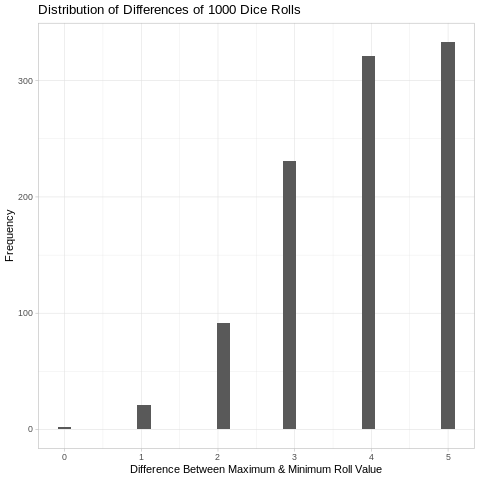

In [23]:
%%R
#Simulate rolling 6-sided dice, store difference between largest and smallest values, repeat 1000 times
rolldice <- function(dice) {
  ceiling(6*runif(5))
}

num_rolls <- 1000

drolls <- replicate(num_rolls, rolldice(5))

differences <- apply(drolls, 2, function(rolls) {
  maxval <- max(rolls)
  minval <- min(rolls)
  return(maxval - minval)
})

resultz <- data.frame(rolls = 1:num_rolls, diff = differences)
#print(resultz)

#Plot histogram of results
diffplot <- ggplot(data = resultz, aes(x = diff)) +
  geom_histogram() + labs(x ="Difference Between Maximum & Minimum Roll Value", y="Frequency", title = "Distribution of Differences of 1000 Dice Rolls") + theme_light()
diffplot

In [24]:
%%R
#Estimate the probability that the difference between the largest and smallest dice is  4  or more:
prob <- sum(resultz[[2]] >= 4)/nrow(resultz)
probability <- prob*100
print("probability percent that the difference between the largest and smallest dice is 4 or more:")
probability

[1] "probability percent that the difference between the largest and smallest dice is 4 or more:"
[1] 65.4


#4. Board Game Risk

In the board game risk, the attacking army get to roll a die where $a =
\text{min(3, number of attacking armies - 1)}$ and the defending army gets to roll d die where $d = \text{min(2, number of defending armies)}$. A battle takes place via series of rolls where the attacker and the defender both roll their allotted number of die. Each combatant then orders their die from largest to smallest and the ordered die are compared to each other. The larger number wins with ties always going to the defender. For example is the attacker rolled $(6, 3, 1)$ and the defender rolled $(6, 2)$, the defender would one (defender 6 beats attacker 6) and the attacker would win one (attacker 3 beats defender 2). In this instance they would both lose one army. This process would then be repeated until the attacker runs out of armies or decides to stop attacking.

$(a)$. Define $X = \text{number of wins for the attacking army}$ (i.e. $0$, $1$, or $2$). In a single turn where the attacker has 3 die and the defender has 2 die, estimate $P(X = 0)$, $P(X = 1)$, and $P(X = 2)$ using Monte Carlo simulation.

In [25]:
%%R
n <- 10000 #number of simulations
win0 <- 0 #set initial number of wins to 0
win1 <- 0
win2 <- 0
#attacker has 3 die, defender has 2 die
for (i in 1:n) {
  attack <- sort(ceiling(6*runif(3)), decreasing = TRUE)
  defend <- sort(ceiling(6*runif(2)), decreasing = TRUE)

  if (attack[1] > defend[1] & attack[2] > defend[2]) {
   win2 <- win2 + 1
  } else if (attack[1] > defend[1] | attack[2] > defend[2]) {
    win1 <- win1 + 1
  } else {
    win0 <- win0 + 1
  }

}

In [26]:
%%R
prob0 <- (win0/n)*100
prob0 #estimate of P(X = 0)

[1] 29.29


In [27]:
%%R
prob1 <- (win1/n)*100
prob1 #estimate of P(X = 1)

[1] 33.11


In [28]:
%%R
prob2 <- (win2/n)*100
prob2 #estimate of P(X = 2)

[1] 37.6


$(b)$. In a battle where both the attacker and the defender have 100 armies, estimate the probability that the attackers win the battle assuming that the attacker will continue to attack until they have only 1 army left (you can’t attack with only 1 army).

In [29]:
%%R
n <- 10000
wins <- 0

for (i in 1:n) {
  attackarmy <- 100
  defendarmy <- 100

  while (attackarmy > 1 & defendarmy > 0) {
    att_dice <- min(3, attackarmy - 1)
    def_dice <- min(2, defendarmy)

      attack <- sort(ceiling(6*runif(att_dice)), decreasing = TRUE)
        defend <- sort(ceiling(6*runif(def_dice)), decreasing = TRUE)

        for (j in 1:min(length(attack), length(defend))) {
          if (attack[j] > defend[j]) {
            defendarmy <- defendarmy - 1
          } else {
            attackarmy <- attackarmy -1
          }
        }
  }
  if (defendarmy == 0) {
    wins <- wins + 1
  }
}

prob <- (wins/n)*100
prob #probability that attackers win the battle

[1] 80.68
